In [33]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns

In [2]:
client = MongoClient("mongodb://localhost:27017/")

In [3]:
db = client["PythonForDs"]
collection = db["isw_report"]

In [4]:
cursor = collection.find()

In [5]:
df = pd.DataFrame(list(cursor))

Default operations to check dataset:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 778 entries, 0 to 777
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   _id             778 non-null    object        
 1   date            778 non-null    datetime64[ns]
 2   extracted_text  778 non-null    object        
dtypes: datetime64[ns](1), object(2)
memory usage: 18.4+ KB


In [9]:
df.describe()

,date
count,778
mean,2024-01-30 07:57:31.928020736
min,2022-02-28 00:00:00
25%,2023-07-17 06:00:00
50%,2024-02-01 12:00:00
75%,2024-08-13 18:00:00
max,2025-03-01 00:00:00


In [10]:
df.isnull().sum()

_id               0
date              0
extracted_text    0
dtype: int64

In [11]:
df.head()

,_id,date,extracted_text
0,67f2a5ae848f87793dfa3bb6,2022-02-28,"Tags Mason Clark, George Barros, and Kateryna ..."
1,67f2a5ae848f87793dfa3bb7,2023-01-02,"Tags Russian Offensive Campaign Assessment, Ja..."
2,67f2a5ae848f87793dfa3bb8,2023-01-03,"Tags Riley Bailey, Grace Mappes, Karolina Hird..."
3,67f2a5ae848f87793dfa3bb9,2023-01-04,"Riley Bailey, Karolina Hird, Kateryna Stepanen..."
4,67f2a5ae848f87793dfa3bba,2023-01-05,"Tags Russian Offensive Campaign Assessment, Ja..."


Visualization of basic parameters:

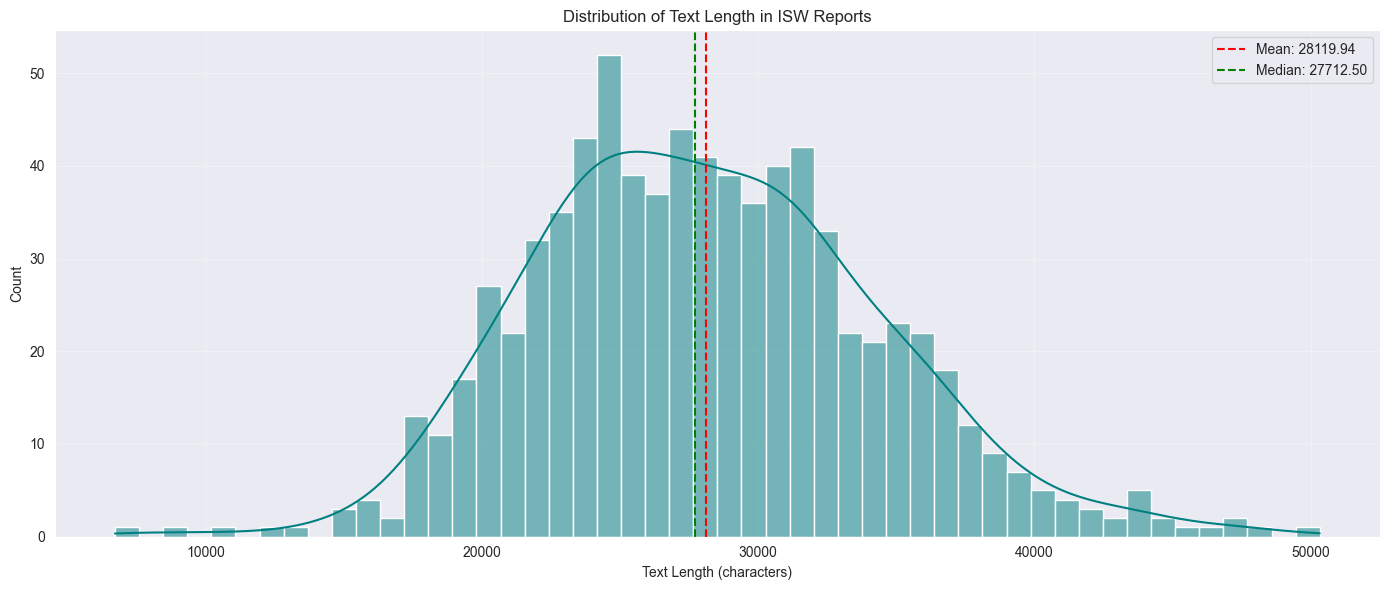

In [45]:
df['text_length'] = df['extracted_text'].apply(len)
plt.figure(figsize=(14, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='teal')
plt.title('Distribution of Text Length in ISW Reports')
plt.xlabel('Text Length (characters)')
plt.ylabel('Count')
plt.axvline(df['text_length'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df["text_length"].mean():.2f}')
plt.axvline(df['text_length'].median(), color='green', linestyle='--', 
           label=f'Median: {df["text_length"].median():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('isw_text_length.png', dpi=300)
plt.show()

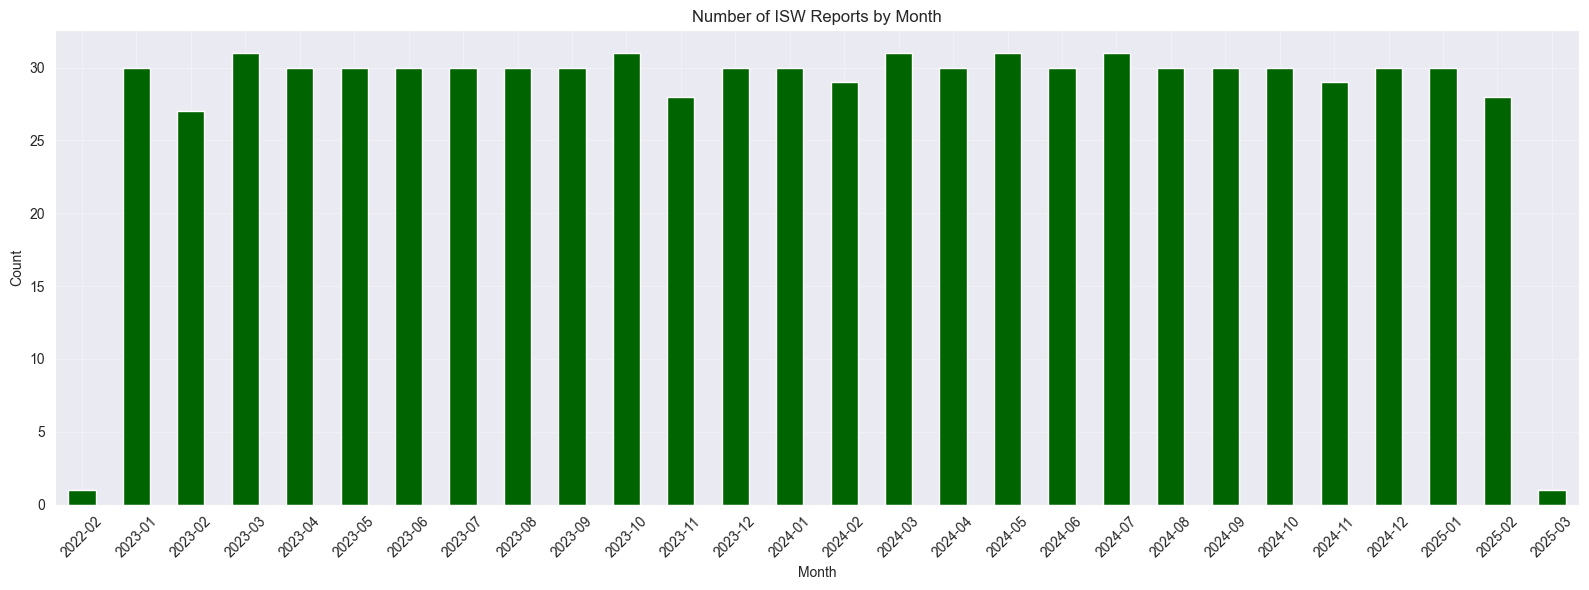

In [46]:
plt.figure(figsize=(16, 6))
df['year_month'] = df['date'].dt.to_period('M')
monthly_counts = df.groupby('year_month').size()
monthly_counts.index = monthly_counts.index.astype(str)
monthly_counts.plot(kind='bar', color='darkgreen')
plt.title('Number of ISW Reports by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('isw_reports_by_month.png', dpi=300)
plt.show()

C:\Users\Администратор\AppData\Local\Temp\ipykernel_22064\423265806.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='Blues_d')


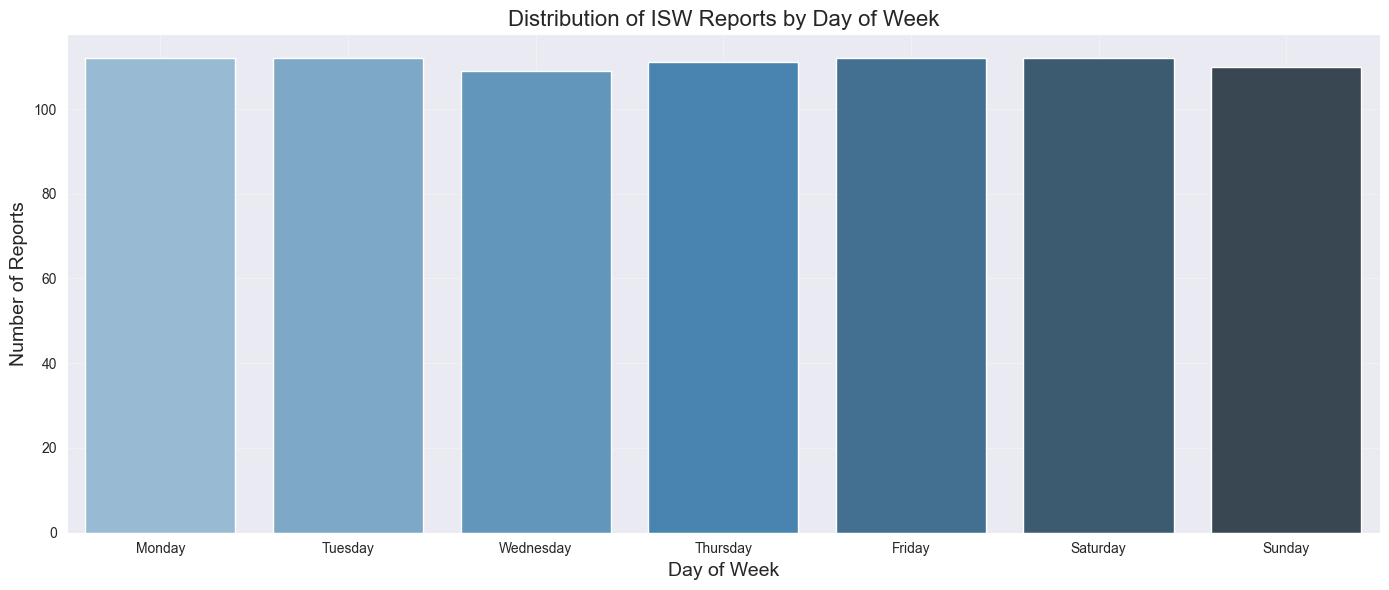

In [47]:
df['day_of_week'] = df['date'].dt.day_name()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(14, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='Blues_d')
plt.title('Distribution of ISW Reports by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Reports', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('isw_reports_by_day.png', dpi=300)
plt.show()

Working with text:

In [49]:
df['text_length'] = df['extracted_text'].apply(len)
df['word_count'] = df['extracted_text'].apply(lambda x: len(str(x).split()))

# Text length statistics
print("\nText length statistics:")
print(f"Mean text length: {df['text_length'].mean():.2f} characters")
print(f"Median text length: {df['text_length'].median():.2f} characters")
print(f"Min text length: {df['text_length'].min()} characters")
print(f"Max text length: {df['text_length'].max()} characters")
print(f"Mean word count: {df['word_count'].mean():.2f} words")
print(f"Median word count: {df['word_count'].median():.2f} words")


Text length statistics:
Mean text length: 28119.94 characters
Median text length: 27712.50 characters
Min text length: 6724 characters
Max text length: 50331 characters
Mean word count: 4101.70 words
Median word count: 4040.50 words


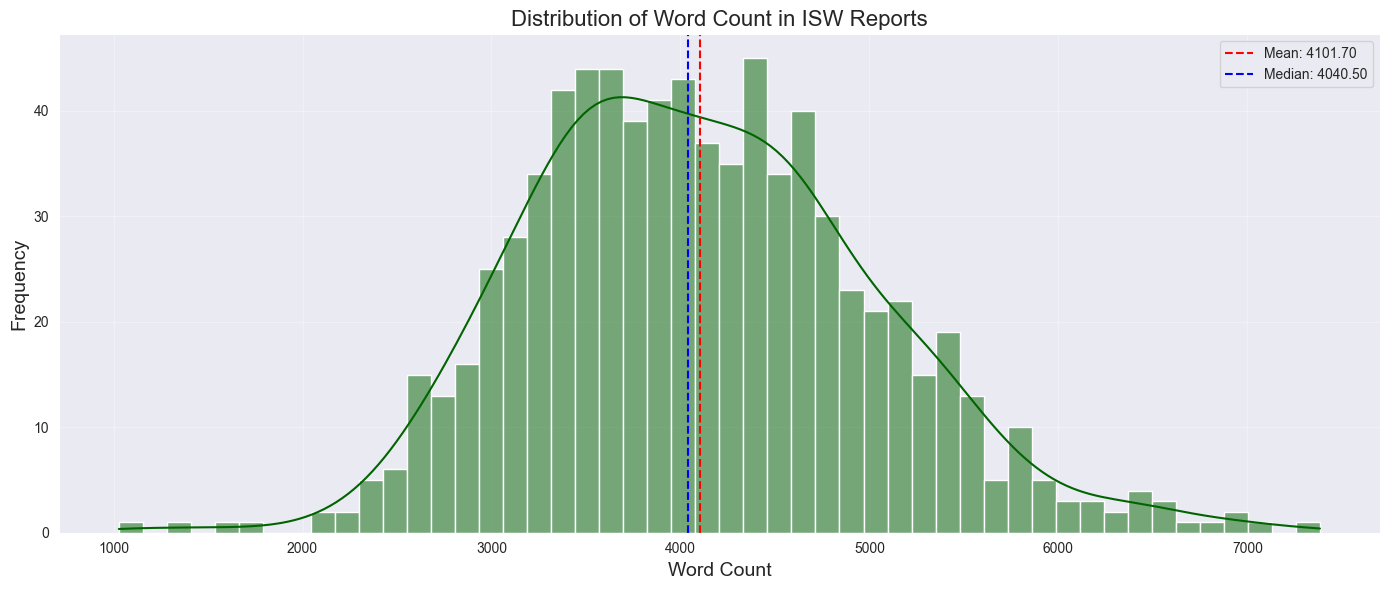

In [53]:
plt.figure(figsize=(14, 6))
sns.histplot(df['word_count'], bins=50, kde=True, color='darkgreen')
plt.title('Distribution of Word Count in ISW Reports', fontsize=16)
plt.xlabel('Word Count', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.axvline(df['word_count'].mean(), color='red', linestyle='--', 
           label=f'Mean: {df["word_count"].mean():.2f}')
plt.axvline(df['word_count'].median(), color='blue', linestyle='--', 
           label=f'Median: {df["word_count"].median():.2f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('isw_word_count_distribution.png', dpi=300)
plt.show()

because lack of reports in first months, we have problems in graphs:

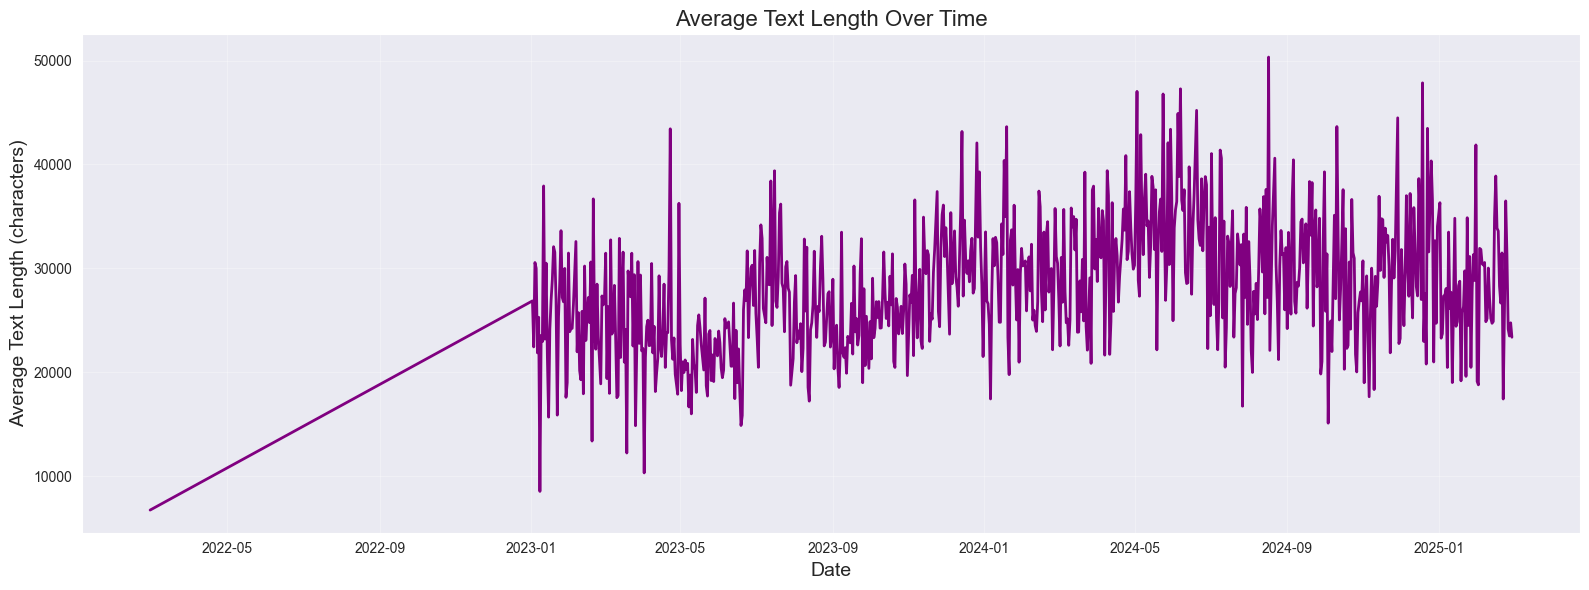

In [54]:
plt.figure(figsize=(16, 6))
text_length_by_date = df.groupby(df['date'].dt.date)['text_length'].mean()
text_length_by_date.plot(color='purple', linewidth=2)
plt.title('Average Text Length Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average Text Length (characters)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('isw_text_length_over_time.png', dpi=300)
plt.show()

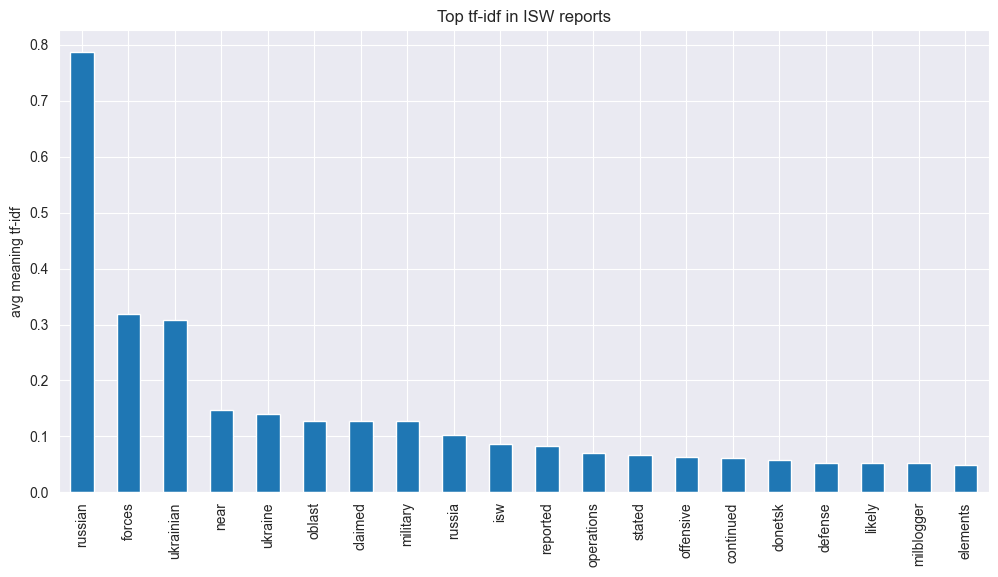

In [22]:
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
X_tfidf = vectorizer.fit_transform(df['extracted_text'])
tfidf_scores = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_scores.mean().sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Top tf-idf in ISW reports")
plt.ylabel("avg meaning tf-idf")
plt.show()


In [25]:
keywords = ["airstrike", "missile", "Belarus", "drone", "air defense", "infrastructure", "bomb"]
for word in keywords:
    df[f'has_{word}'] = df['extracted_text'].str.lower().str.contains(word)

In [32]:
df.head()

,_id,date,extracted_text,has_airstrike,has_missile,has_Belarus,has_drone,has_air defense,has_infrastructure,has_bomb
0,67f2a5ae848f87793dfa3bb6,2022-02-28,"Tags Mason Clark, George Barros, and Kateryna ...",True,True,False,False,False,True,False
1,67f2a5ae848f87793dfa3bb7,2023-01-02,"Tags Russian Offensive Campaign Assessment, Ja...",False,True,False,True,True,True,False
2,67f2a5ae848f87793dfa3bb8,2023-01-03,"Tags Riley Bailey, Grace Mappes, Karolina Hird...",False,False,False,True,True,False,False
3,67f2a5ae848f87793dfa3bb9,2023-01-04,"Riley Bailey, Karolina Hird, Kateryna Stepanen...",False,True,False,True,True,True,False
4,67f2a5ae848f87793dfa3bba,2023-01-05,"Tags Russian Offensive Campaign Assessment, Ja...",False,True,False,False,True,True,False


In [38]:
mentions_over_time = df.groupby('date')[[f'has_{w}' for w in keywords]].sum()

In [39]:
mentions_over_time

,has_airstrike,has_missile,has_Belarus,has_drone,has_air defense,has_infrastructure,has_bomb
date,,,,,,,
2022-02-28,1,1,0,0,0,1,0
2023-01-02,0,1,0,1,1,1,0
2023-01-03,0,0,0,1,1,0,0
2023-01-04,0,1,0,1,1,1,0
2023-01-05,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...
2025-02-25,0,1,0,1,1,1,1
2025-02-26,0,1,0,1,1,1,0
2025-02-27,0,1,0,1,1,1,0
